<img src="https://content.presspage.com/uploads/1369/1920_stock-photo-iceberg-aerial-photo-giant-icebergs-in-disko-bay-on-greenland-floating-in-ilulissat-icefjord-from-1289165434.jpg?10000" width=1130  />

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from math import log10, sqrt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
image_name=['mylius_erichsen_land_2000.jpg', 'mylius_erichsen_land_2020.jpg']
image_src1 = cv2.imread(image_name[0])
image_src2 = cv2.imread(image_name[1])

In [2]:
def image_show (image_name, rgb):
  col = Image.open(image_name)
  gray = col.convert('L')

  bw = np.asarray(gray).copy()
  bw[bw < rgb] = 0    # Black
  bw[bw >= rgb] = 255 # White

  imfile = Image.fromarray(bw)
  return imfile , bw

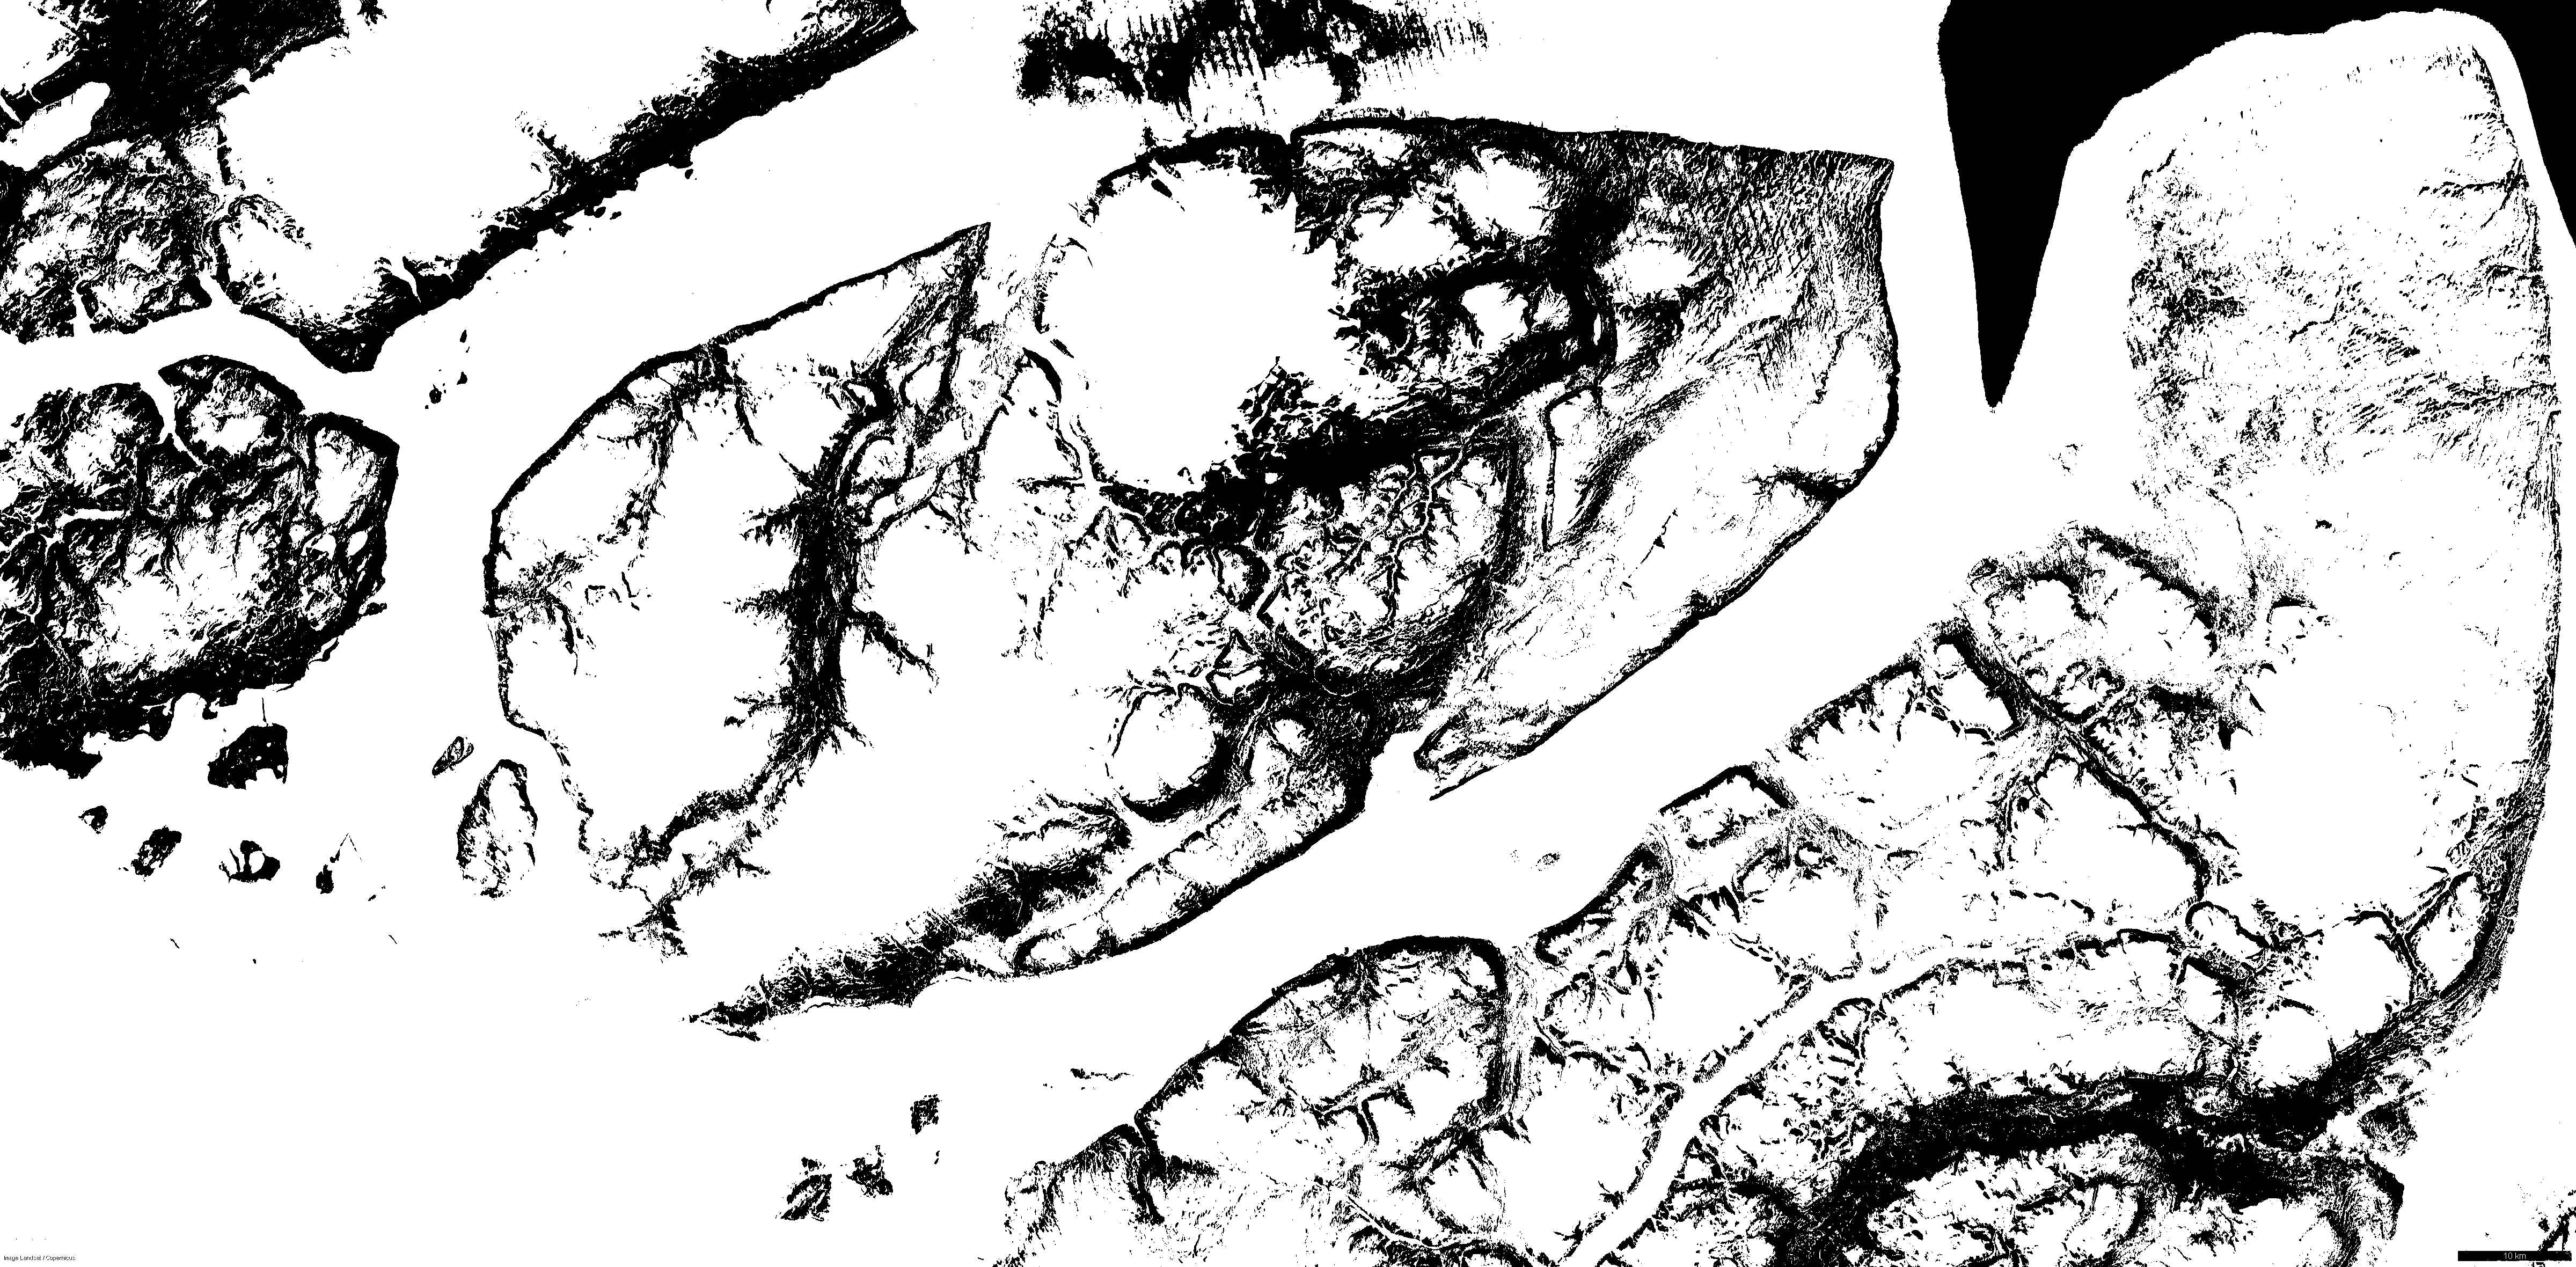

In [ ]:
b_W_image= []
bw=[]
for i in image_name:
  image , mat =image_show(i, 190)
  image
  b_W_image.append(image)
  bw.append(mat)
b_W_image[0]

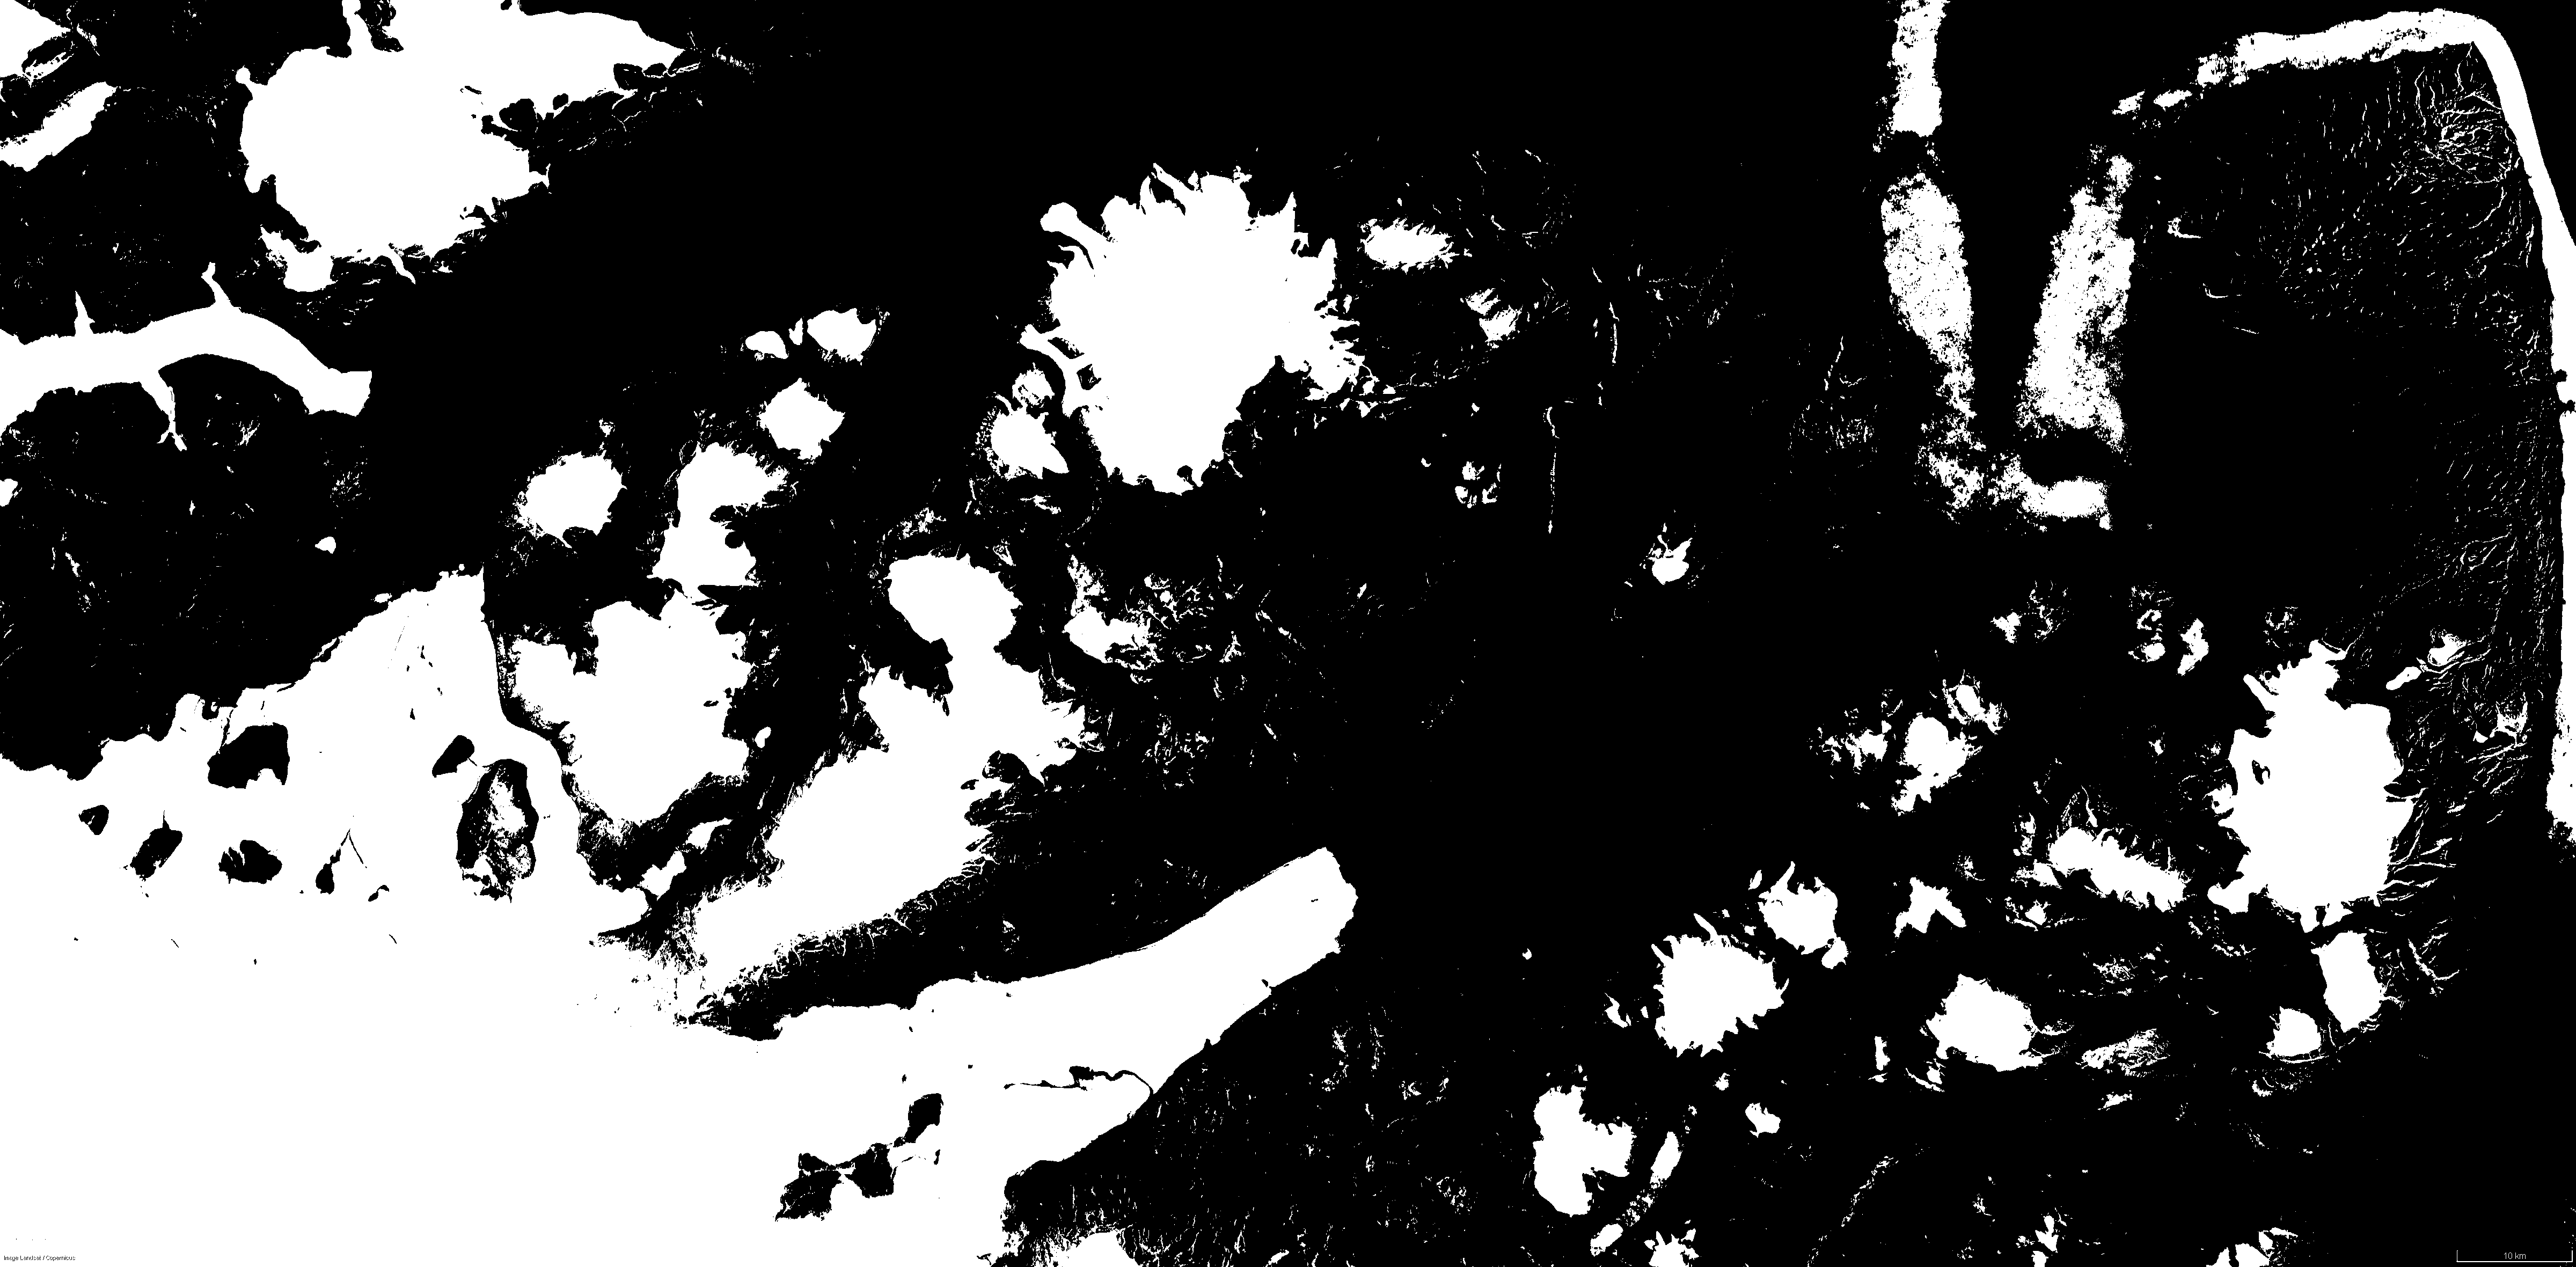

In [ ]:
b_W_image[1]

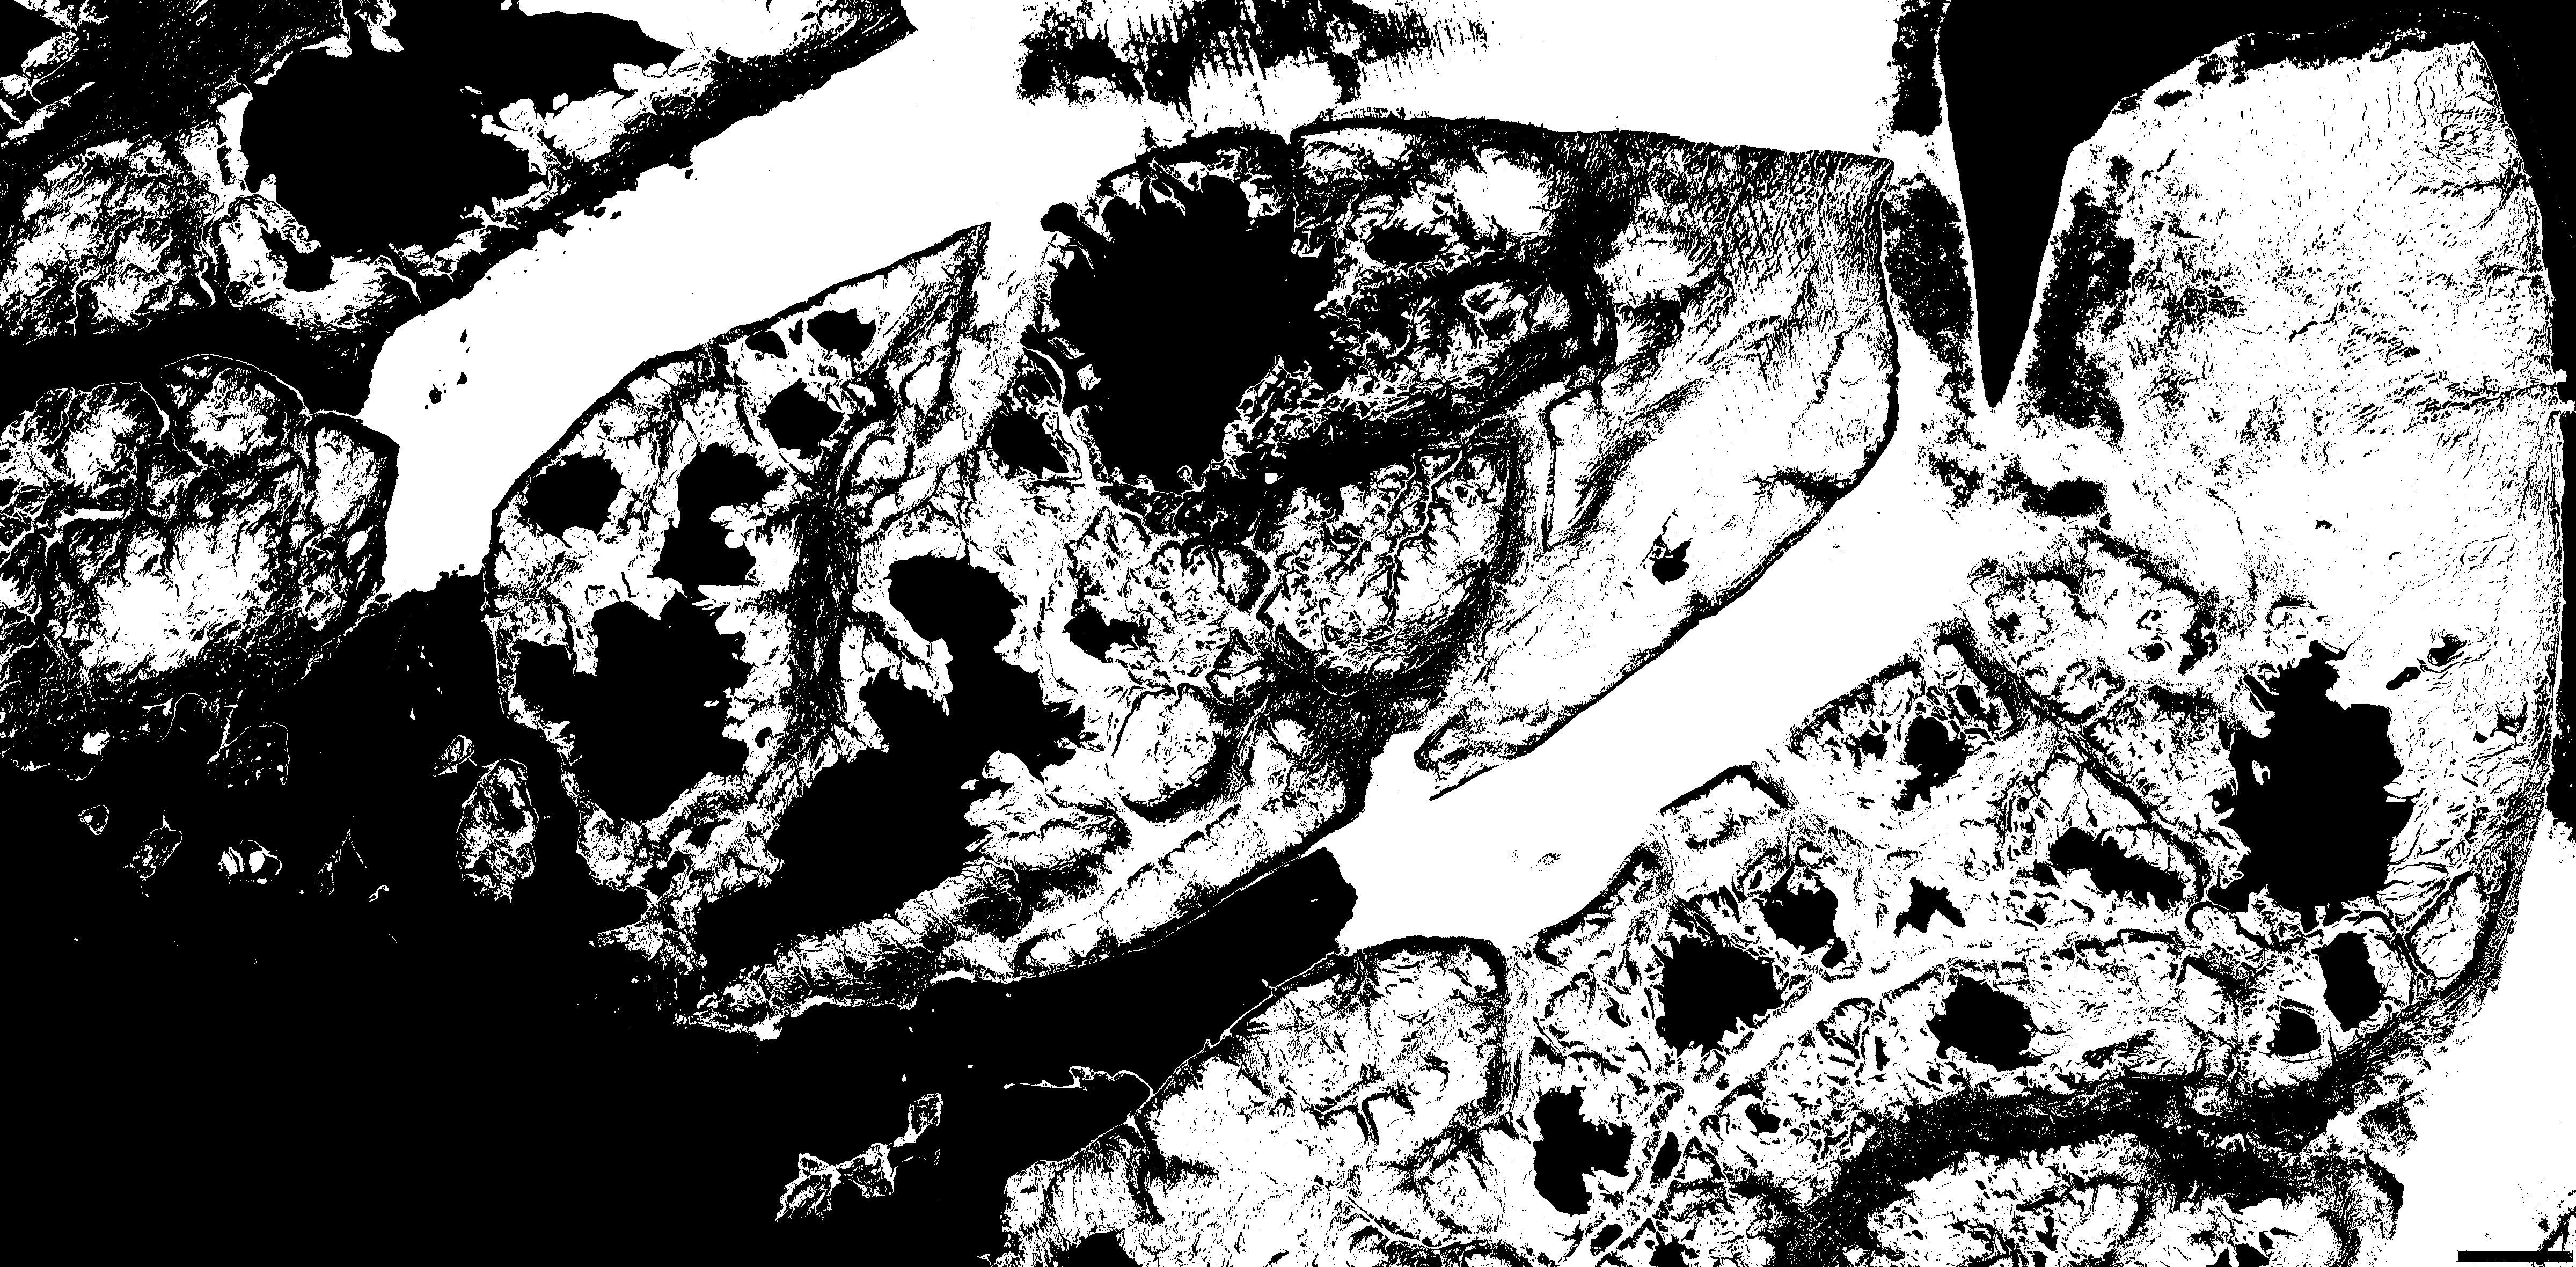

In [ ]:
image = bw[0] - bw[1]
image = Image.fromarray(image)
image


Calculate melted ice by counting white pixels

In [3]:
def melted_ice_percentagelist (image1, image2):
  ice_pixels = list(image1.flatten()).count(255)
  melted_ice_pixels = list(image2.flatten()).count(255)
  matrix_size = image1.size

  percentage= ((ice_pixels -melted_ice_pixels)/ice_pixels ) *100
  return percentage

In [ ]:
ice_melted = melted_ice_percentagelist(bw[0], bw[1])
print(ice_melted, ' percent of ice is melted in 20 years ')

61.11157697993615  percent of ice is melted in 20 years 


#part 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lake_urmia_2000.jpg to lake_urmia_2000.jpg
Saving lake_urmia_2018.jpg to lake_urmia_2018.jpg
Saving lake_urmia_2020.jpg to lake_urmia_2020.jpg


In [ ]:
lake_urmia=['lake_urmia_2000.jpg', 'lake_urmia_2018.jpg', 'lake_urmia_2020.jpg']

In [ ]:
lake_2000=cv2.imread(lake_urmia[0])
lake_2018=cv2.imread(lake_urmia[1])
lake_2020=cv2.imread(lake_urmia[2])

lake_2000= cv2.cvtColor(lake_2000, cv2.COLOR_BGR2RGB)
lake_2018= cv2.cvtColor(lake_2018, cv2.COLOR_BGR2RGB)
lake_2020= cv2.cvtColor(lake_2020, cv2.COLOR_BGR2RGB)

In [4]:
def gray_scale (image, left, up, l_r, l_b , l_g, r_r , r_b, r_g):
  M_image = image[:, left: up]
  M_image = cv2.inRange(image, (l_r, l_b, l_g), (r_r, r_b, r_g))
  image = Image.fromarray(M_image)
  return image, M_image

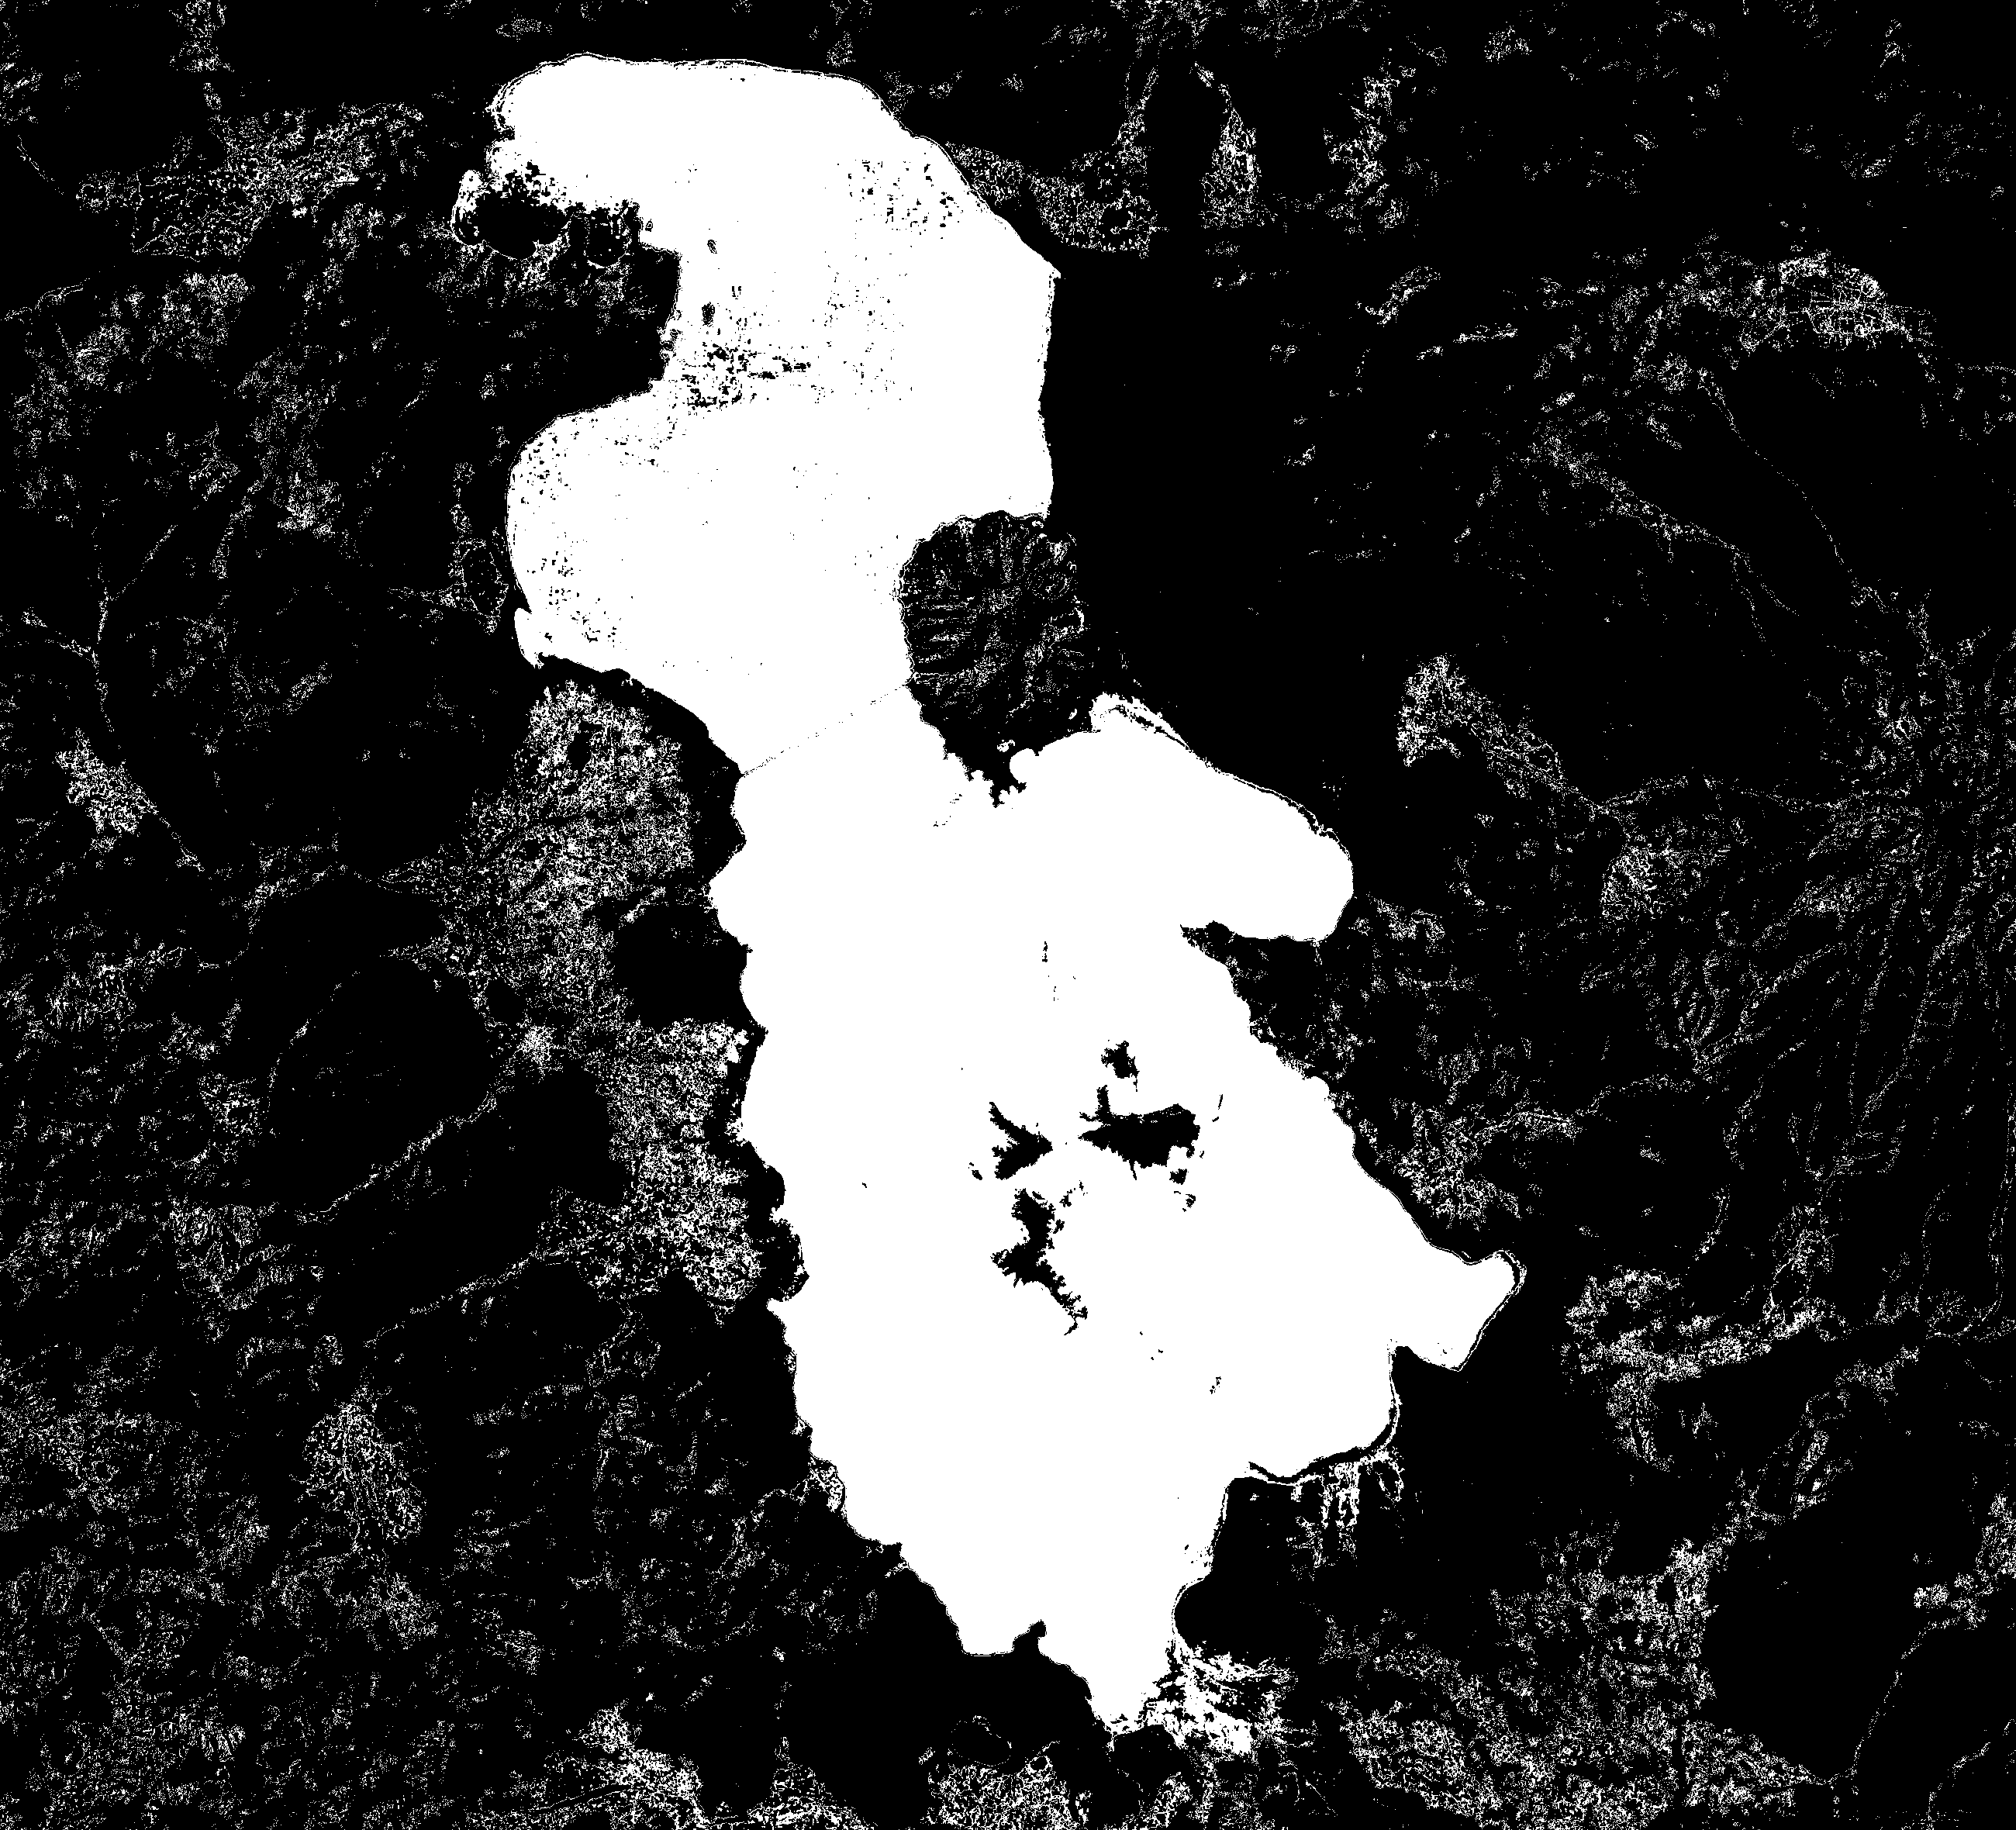

In [ ]:
gray_lake_2000, matrix_2000=gray_scale(lake_2000, 400, (-580), 0, 60, 90, 110, 255, 255)
gray_lake_2000

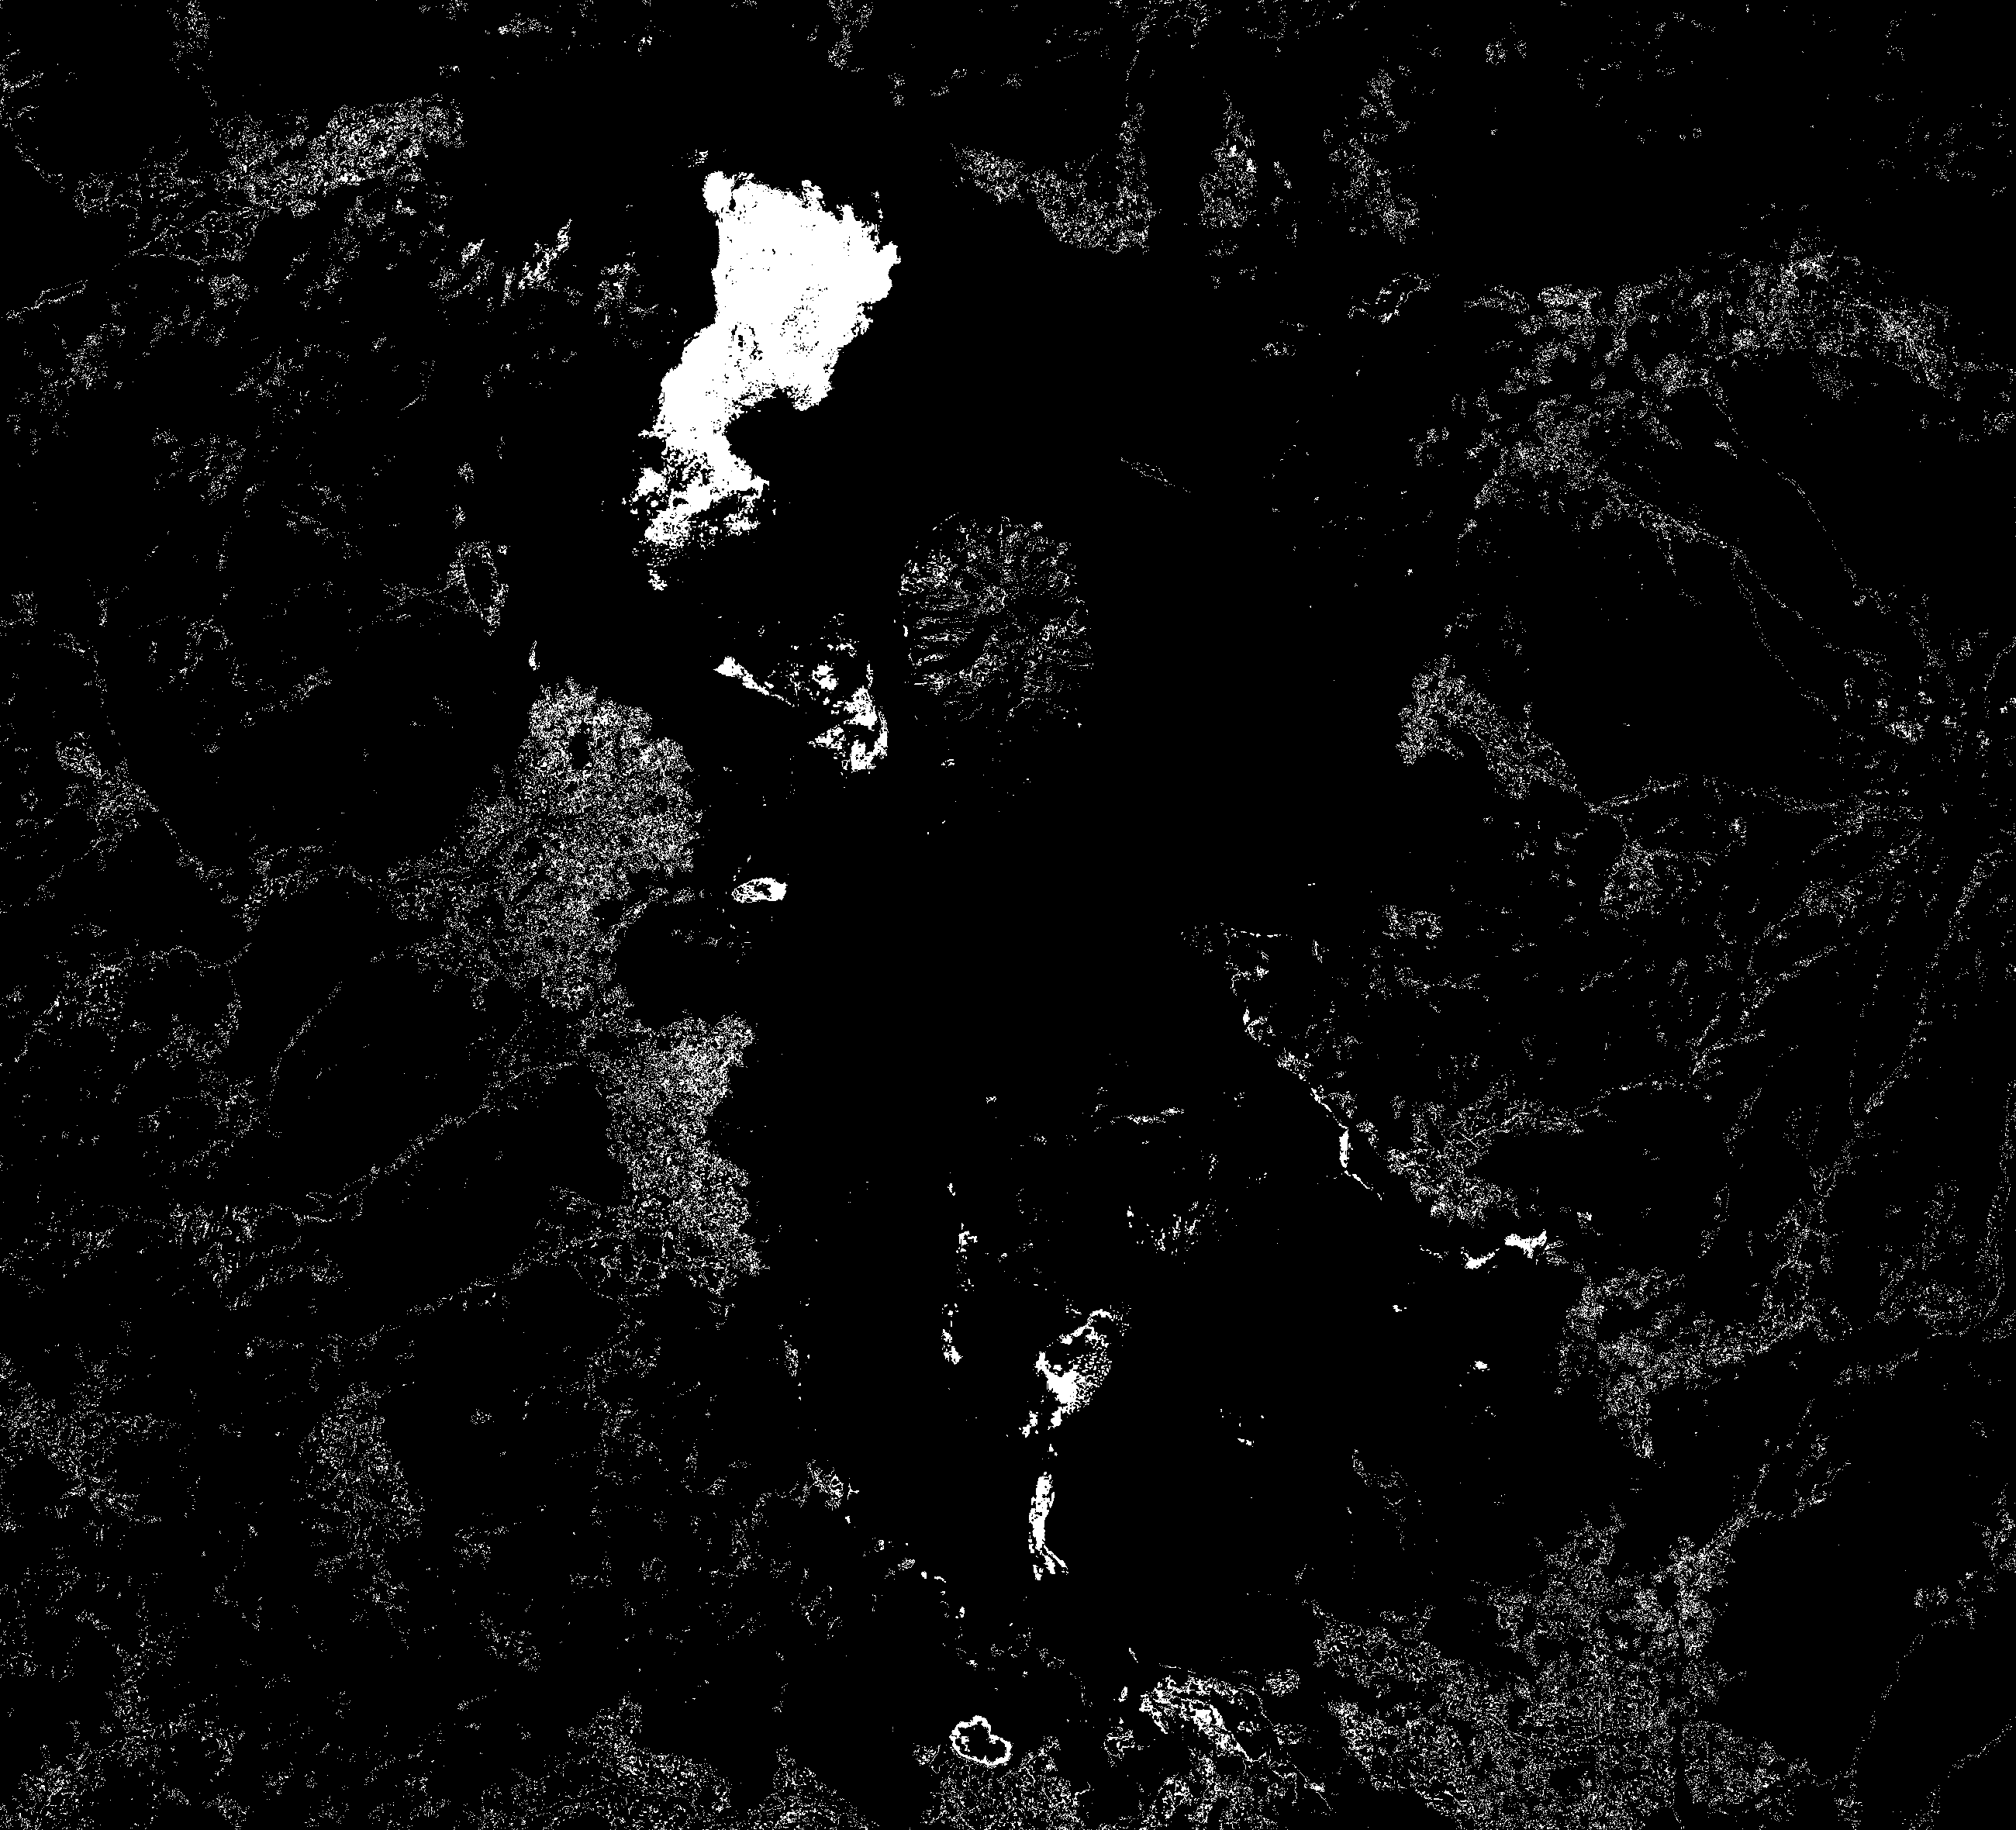

In [ ]:
gray_lake_2018, matrix_2018=gray_scale(lake_2018, 400, (-580), 75, 60, 90, 110, 255, 255)
gray_lake_2018

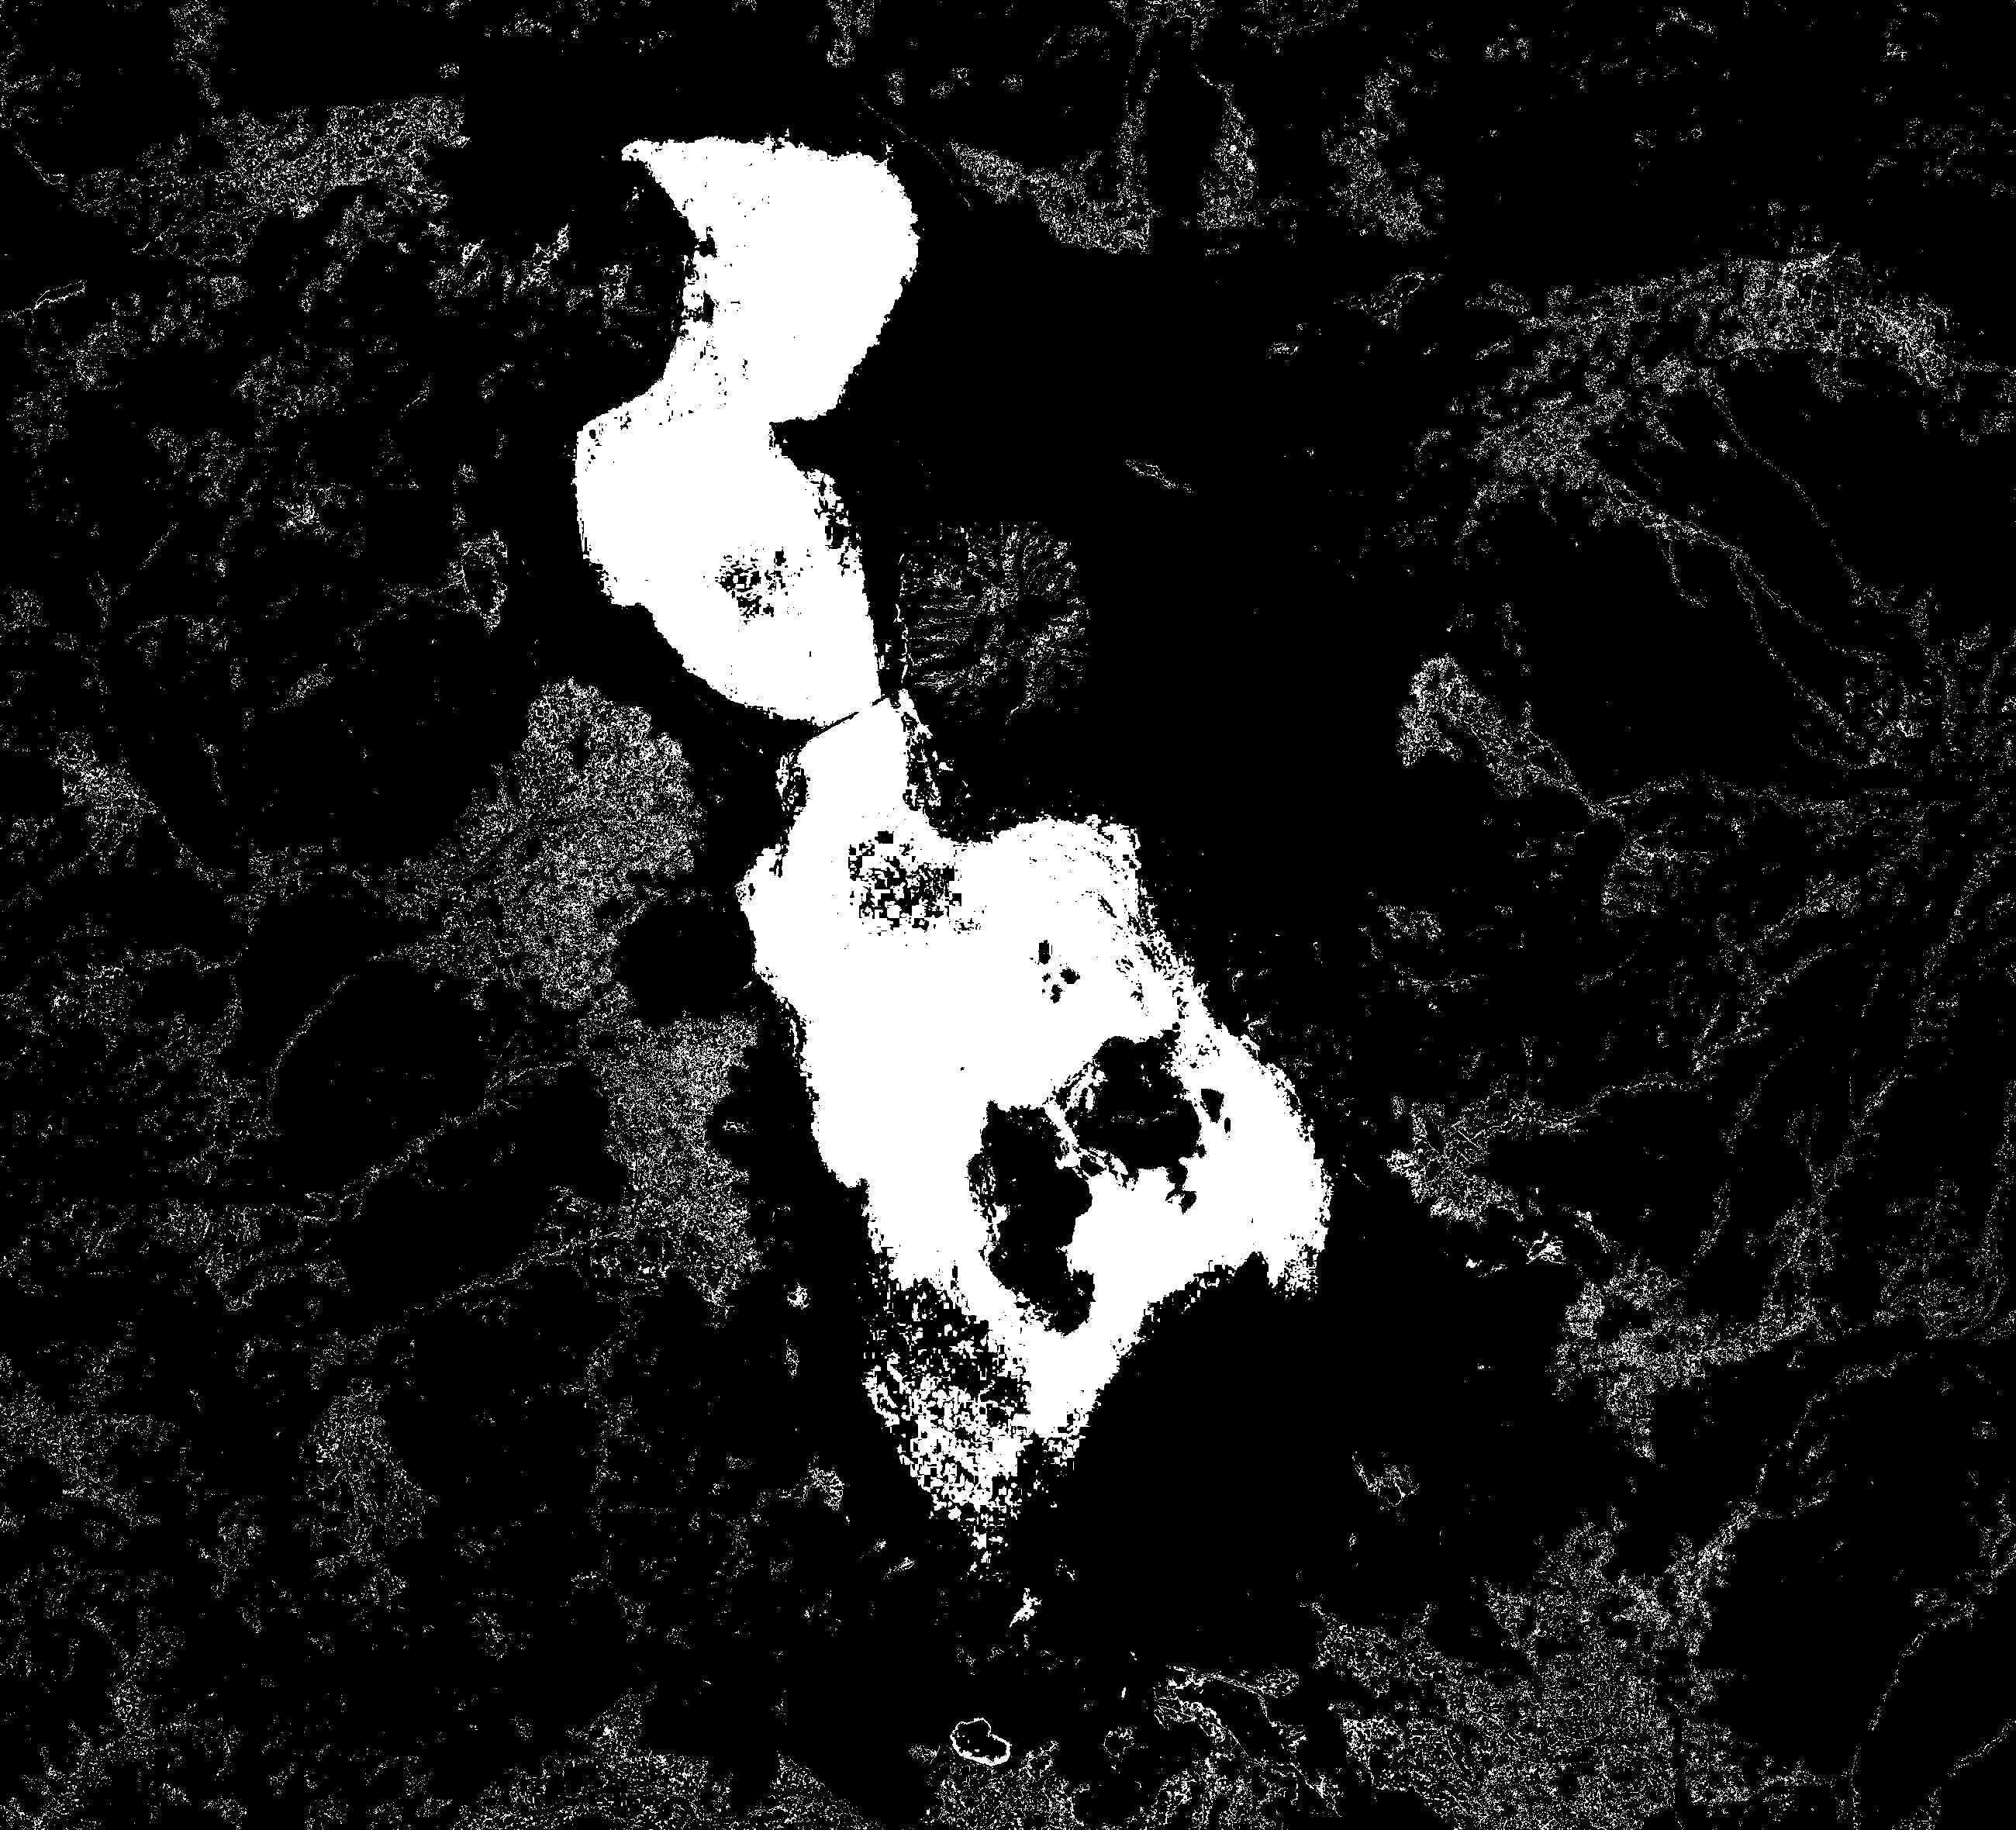

In [ ]:
gray_lake_2020, matrix_2020=gray_scale(lake_2020, 400, (-580), 75, 60, 90, 110, 255, 255)
gray_lake_2020

In [ ]:
water_2000, water_2018, water_2020 = 0, 0,0
for i in range(len(matrix_2020)):
  for j in matrix_2000[i]:
    if j == 255 :
      water_2000 +=1
  for j in matrix_2018[i]:
    if j == 255 :
      water_2018 +=1
  for j in matrix_2020[i]:
    if j == 255 :
      water_2020 +=1

Calculating the volumn of changes in every picture by giving scale and volume

In [5]:
def calculate_volume(mat, scale, pixels, volume):
  res = (np.power(np.divide(np.sqrt(mat) , pixels)*scale , 2 ) * volume)
  return res

In [ ]:
water_volume_2000 =  calculate_volume(water_2000, 20, 314, 0.0028 )

In [ ]:
water_volume_2018 =  calculate_volume(water_2000, 20, 314, 0.0006 )


In [ ]:
reduced_volume_2000_2018 = water_volume_2000- water_volume_2018
print('reduced volume of water between 2000 to 2018 is : ' ,reduced_volume_2000_2018 , 'for km3')

reduced volume of water between 2000 to 2018 is :  13.364618442938863 for km3


In [ ]:
water_volume_2020 =  calculate_volume(water_2000, 20, 314, 0.0009 )
restored_volume_2020 = water_volume_2020 - water_volume_2018
restored_volume_2020_percentage = (restored_volume_2020/water_volume_2000) *100
print( restored_volume_2020_percentage, ' percent of the lake has been restored since 2018 to 2020')

10.714285714285717  percent of the lake has been restored since 2018 to 2020


In [6]:
from google.colab import files
uploaded = files.upload()

Saving furtwangler_glacier_2003.jpg to furtwangler_glacier_2003.jpg
Saving furtwangler_glacier_2017.jpg to furtwangler_glacier_2017.jpg


In [34]:
d_image_name=['furtwangler_glacier_2003.jpg', 'furtwangler_glacier_2017.jpg']
image_d=[]
img1=cv2.imread(d_image_name[0])
img2=cv2.imread(d_image_name[1])
image_d.append(cv2.cvtColor(img1[1800:-100, 100:900], cv2.COLOR_BGR2GRAY))
image_d.append(cv2.cvtColor(img2[1800:-100, 100:900], cv2.COLOR_BGR2GRAY))


In [35]:
def image_show2 (image_name, rgb):
  gray = image_name

  bw = np.asarray(gray).copy()
  bw[bw < rgb] = 0    # Black
  bw[bw >= rgb] = 255 # White

  imfile = Image.fromarray(bw)
  return imfile , bw

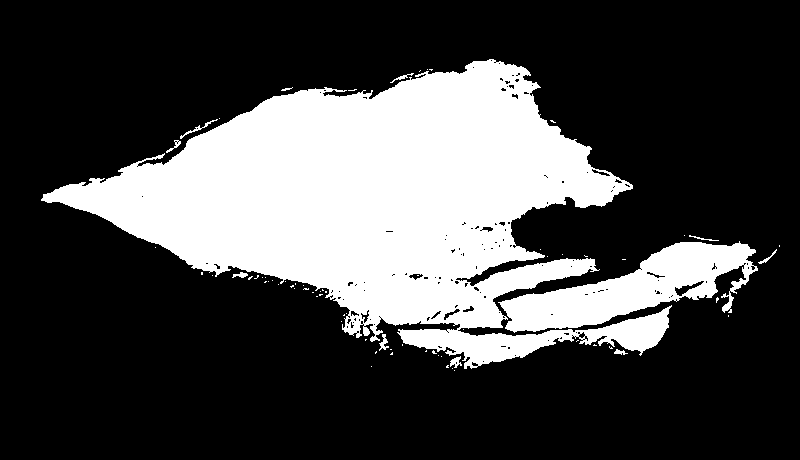

In [37]:
d_b_W_image= []
d_bw=[]
for i in image_d:
  image , mat =image_show2(i, 190)
  d_b_W_image.append(image)
  d_bw.append(mat)
d_b_W_image[0]

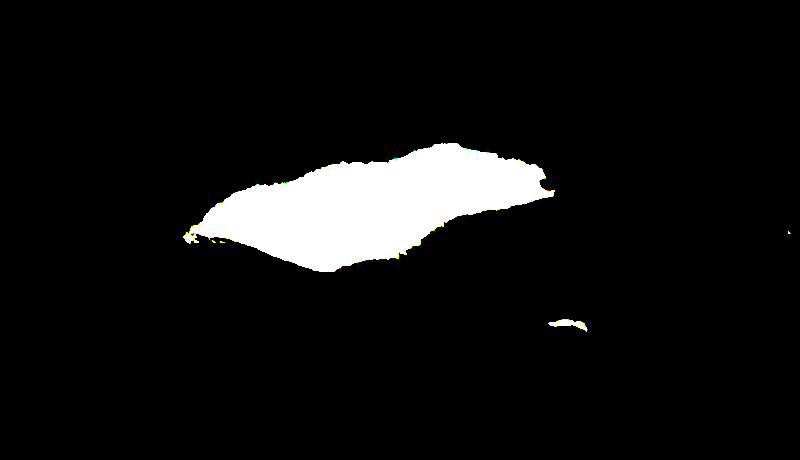

In [28]:
d_b_W_image[1]

we measure white pixels before and after, and with the given height and dept we calculte melted ice

In [38]:
d_ice_melted = melted_ice_percentagelist(d_bw[0], d_bw[1])
print(d_ice_melted, ' percent of ice is melted in 14 years ')

74.91318252270989  percent of ice is melted in 14 years 


In [39]:
from google.colab import files
uploaded = files.upload()

Saving siling_lake_1985.jpg to siling_lake_1985.jpg
Saving siling_lake_1990.jpg to siling_lake_1990.jpg
Saving siling_lake_1995.jpg to siling_lake_1995.jpg
Saving siling_lake_2000.jpg to siling_lake_2000.jpg
Saving siling_lake_2005.jpg to siling_lake_2005.jpg
Saving siling_lake_2010.jpg to siling_lake_2010.jpg
Saving siling_lake_2015.jpg to siling_lake_2015.jpg
Saving siling_lake_2020.jpg to siling_lake_2020.jpg


In [40]:

e_images_names=['siling_lake_1985.jpg', 'siling_lake_1990.jpg', 'siling_lake_1995.jpg',
          'siling_lake_2000.jpg', 'siling_lake_2005.jpg', 'siling_lake_2010.jpg', 'siling_lake_2015.jpg', 'siling_lake_2020.jpg']
e_images=[]
for i in e_images_names:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  e_images.append(image)

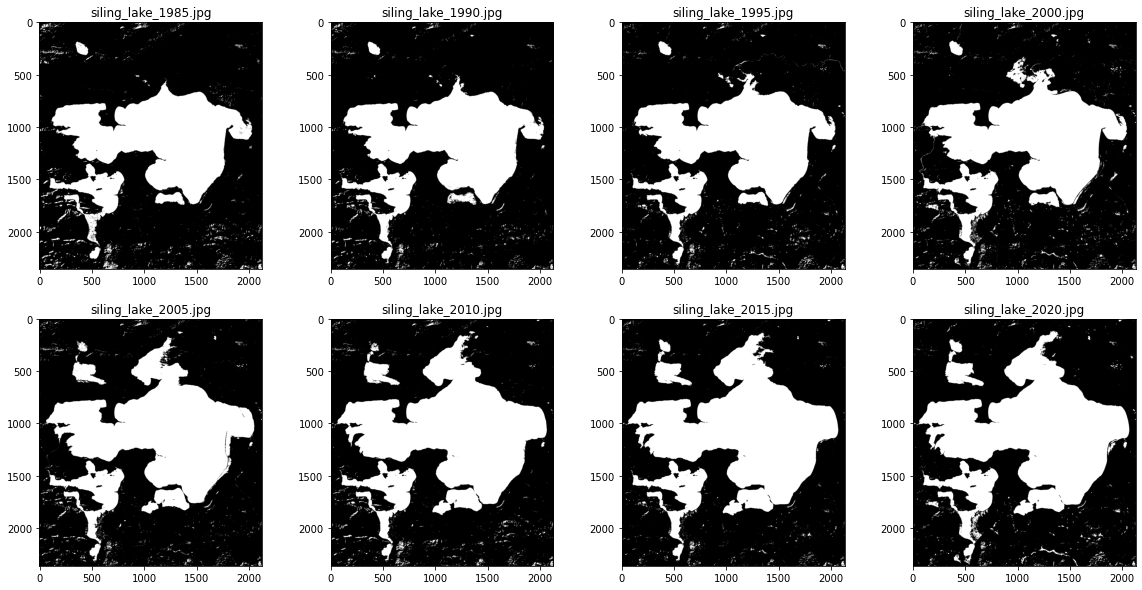

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
volumes = []
for i, (lake, name, ax) in enumerate(zip(e_images ,e_images_names, fig.axes)):
  water = 0
  lake = cv2.inRange(lake, (0, 0, 0), (85, 255, 255))
  _, lake = cv2.threshold(lake, 0, 255, cv2.THRESH_OTSU)

  ax.imshow(lake, cmap='gray')
  ax.set_title(name)

  for i in range(lake.shape[0]):
    for j in lake[i]:
      if j == 255:
        water += 1
    
  area = calculate_volume(water, 10, 251, np.add(0.0064, np.multiply(0.0003, i)))
  volumes.append(area)
    
plt.show()

## plot of changes in 35 years

we measure white pixels in every picture and plot them

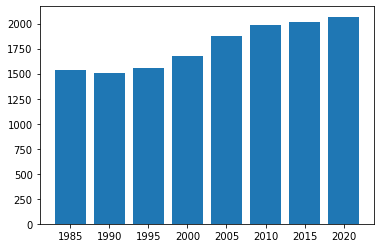

In [42]:
plt.bar(['1985','1990', '1995','2000','2005','2010','2015','2020'], volumes)
plt.show()